# Cleaning and Analysing a Dataset of Used Cars from eBay

In this project, we'll work with a modified dataset of used cars from *eBay Kleinanzeigen*, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). A few modifications were made from the original dataset that was uploaded to Kaggle in order to fulfill this project's learning purposes.

In this dataset we'll find the following columns:
* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.

The goal os this project is to clean the data and then perforn somes analysis using the Pandas, numPy and matplotlib libraries.

**Disclaimer: This is guided project from the DataQuest's "Pandas and NumPy Fundamentals" course developed by learning purposes. Although it may look like other projects made for the same reason, this project has some features of its own that were implemented by me, such as the use of charts, for example. Every line in this project was though of and typed by me.**


Let's begin by importing the libraries we'll use.

In [1]:
import pandas as pd
import numpy as np

And then we'll take advantage of the `pandas.read_csv` function to read the `.csv` file into a DataFrame.

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

We'll now do some quick exploring through the dataset.

In [3]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÃV_neu_ist_sehr_gepfle...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As we can see, only five columns have null data, which is good. Also, five columns have the data stored as integers:

* yearOfRegistration;
* powerPS;
* monthOfRegistration;
* nrOfPictures;
* postalCode


We can also notice that some columns contain german words, which is normal since this dataset is from a german website. We'll fix that later in this project.

We'll now change the name of the columns. The column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case). For that we will use the `DataFrame.columns` attribute.

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

print(autos.columns)
autos.head()

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')


,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÃV_neu_ist_sehr_gepfle...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As you can see, the columns were renamed. Let's keep exploring the dataset.

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-22 09:51:06,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Notice that the 'seller', 'offer_type' and 'num_photos' columns have basically one value each. As it does not make sense to have columns like this in the dataset, we'll start the cleaning process by droping those columns.

## Cleaning the data

Before dropping the columns, let's take a closer look into them.

In [7]:
print(autos['seller'].value_counts())
print('\n')
print(autos['offer_type'].value_counts())
print('\n')
print(autos["num_photos"].value_counts())

privat        49999
gewerblich        1
Name: seller, dtype: int64


Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


0    50000
Name: num_photos, dtype: int64


Now we can easily see that the 'num_photos' column only has one value and that the 'seller' and 'offer_type' columns only have one row with a differente value from the others.

We'll now drop those columns and use `DataFrame.shape` to check if the columns were actually deleted.

In [8]:
print(autos.shape)
autos = autos.drop(['seller', 'offer_type', 'num_photos'], axis=1)
print(autos.shape)

(50000, 20)
(50000, 17)


Columns deleted.

We'll now fix the problem of the columns with german words stored. First, let's take a look in the distinct values in each one of those columns so we know what words we'll need to translate.

In [9]:
print(autos['gearbox'].unique())
print('\n')
print(autos['fuel_type'].unique())
print('\n')
print(autos['unrepaired_damage'].unique())

['manuell' 'automatik' nan]


['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']


['nein' nan 'ja']


Now that we know all the german words in those columns, we'll create a dictionary for each of the columns containing the german word as key and the corresponding english word as value. Then, we'll use the `pandas.Series.map
` to replace the german words for the english words in the whole dataset.

In [10]:
# dictionaries
mapping_dict_gearbox = {
    'manuell' : 'manually',
    'automatik' : 'automatic'}
mapping_dict_fuel = {  
    'lpg' : 'lpg',
    'benzin' : 'gasoline',
    'diesel' : 'diesel',
    'cng' : 'cng',
    'hybrid' : 'hybrid',
    'elektro' : 'elektro',
    'andere' : 'other'}
mapping_dict_damage = {
    'nein' : 'no',
    'ja' : 'yes'
}

# translating
autos['gearbox'] = autos['gearbox'].map(mapping_dict_gearbox)
autos['fuel_type'] = autos['fuel_type'].map(mapping_dict_fuel)
autos['unrepaired_damage'] = autos['unrepaired_damage'].map(mapping_dict_damage)

Let's check the result.

In [11]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manually,158,andere,"150,000km",3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatic,286,7er,"150,000km",6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manually,102,golf,"70,000km",7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatic,71,fortwo,"70,000km",6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÃV_neu_ist_sehr_gepfle...,"$1,350",test,kombi,2003,manually,0,focus,"150,000km",7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


The data was successfully translated, but looking at the 'model' column we can see that its first value is the german word 'andere'. We know from the translating we just did that 'andere' means 'other'. Let's fix this.

As we're now dealing with the 'model' column, we'll assume the 'andere' is the only german word in the column and that the other values are the actual names of the models. Therefore, as we are only translating one word in the entire column, it's easier to use a boolean filtering to update the data than to create a dictionary and then use `pandas.Series.map` again. Let's do it

In [12]:
autos.loc[autos['model'] == 'andere', 'model'] = 'other'
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manually,158,other,"150,000km",3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatic,286,7er,"150,000km",6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manually,102,golf,"70,000km",7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatic,71,fortwo,"70,000km",6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÃV_neu_ist_sehr_gepfle...,"$1,350",test,kombi,2003,manually,0,focus,"150,000km",7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Moving on, we can see that the 'price' and 'odometer' columns contain numeric data. However, this data is stored as string because of characters such as ',', '$' and 'km'. We'll clean these two columns removing those characters and then transforming the values to integer.

We'll also rename the 'odometer' column to 'odometer_km' so it is clear what the column's values are about.

In [13]:
# cleaning 'price' column
autos['price'] = autos['price'].str.replace(',', '')
autos['price'] = autos['price'].str.replace('$', '')
autos['price'] = autos['price'].astype(int)

# cleaning 'odometer' column
autos['odometer'] = autos['odometer'].str.replace(',', '')
autos['odometer'] = autos['odometer'].str.replace('km', '')
autos['odometer'] = autos['odometer'].astype(int)
# renaming the column
autos.rename({'odometer' : 'odometer_km'}, axis=1, inplace=True)

autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manually,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manually,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÃV_neu_ist_sehr_gepfle...,1350,test,kombi,2003,manually,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Now let's take a closer look in these two colmns, starting with 'odometer_km'.

In [14]:
print(autos['odometer_km'].describe())

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


In [15]:
print(autos['odometer_km'].sort_values(ascending=False).unique())

[150000 125000 100000  90000  80000  70000  60000  50000  40000  30000
  20000  10000   5000]


The values in this column seem to have been rounded. The highest value is 150,000 and the lowest is 5,000. All of this seems plausible.

Let's look the 'price' column.

In [16]:
print(autos['price'].describe())

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


For the 'price', the lowest value is 0 and highest value is so high that it does not even makes sense.

Let's look for the top 20 highest values and the top 20 lowest values for the column and see if we can come up with something.

In [17]:
print(autos['price'].value_counts().sort_index(ascending=False).head(20))
print('\n')
print(autos['price'].value_counts().sort_index(ascending=True).head(20))


99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64


0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64


We now can see the data more clearly. There are values over the dozens of millions and values lower than fifty bucks. 

In order to work with more realistic data, we'll exclude rows where the 'price' column is above one million or below one hundred. We'll use `Series.between` for this job.

In [18]:
autos = autos[autos['price'].between(100, 1000000)]
autos['price'].describe()

count     48227.000000
mean       5992.208099
std       11994.952272
min         100.000000
25%        1250.000000
50%        3000.000000
75%        7499.000000
max      999999.000000
Name: price, dtype: float64

Now we have more reasonable values.

We'll now work with dates. There are 5 columns that should represent date values:

* date_crawled 
* ad_created
* last_seen
* registration_year
* registration_month

The last two are already stored as integer once they represent only years and months. The first three, however, are stored as string. We'll use the `Pandas.to_datetime` attribute to convert them into datetime objects. 

In [19]:
autos['date_crawled'] = pd.to_datetime(autos['date_crawled'], format='%Y-%m-%d %H:%M:%S')
autos['ad_created'] = pd.to_datetime(autos['ad_created'], format='%Y-%m-%d %H:%M:%S')
autos['last_seen'] = pd.to_datetime(autos['last_seen'], format='%Y-%m-%d %H:%M:%S')

Now we are going to take a closer look in the 'registration_year' column.

In [20]:
autos['registration_year'].describe()

count    48227.000000
mean      2004.730151
std         87.894768
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The minimum value is 1000 and the maximum value is 9999. That does not make sense. Let's look for the top 10 highest and lowest values in this column.

In [21]:
print(autos['registration_year'].value_counts().sort_index(ascending=False).head(10))
print('\n')
print(autos['registration_year'].value_counts().sort_index(ascending=True).head(10))

9999    3
9000    1
8888    1
6200    1
5911    1
5000    3
4800    1
4500    1
4100    1
2800    1
Name: registration_year, dtype: int64


1000    1
1001    1
1111    1
1800    2
1910    2
1927    1
1929    1
1931    1
1934    2
1937    4
Name: registration_year, dtype: int64


There are values representing years long before cars were even invented and values representing years way ahead in the future.

Considering that [cars were invented in the eighteen hundreds](https://en.wikipedia.org/wiki/Car), we'll delete rows where the 'resgistration_year' column represents a year before 1900 or after 2020. We'll again use `Series.between`.

In [22]:
autos = autos[autos['registration_year'].between(1900,2020)]
autos['registration_year'].describe()

count    48208.000000
mean      2003.489317
std          7.512658
min       1910.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2019.000000
Name: registration_year, dtype: float64

# Analysing the Data

We'll now perform some quick analysis in this dataset.

To start we'll keep working with the 'registration year' column. Let's see the 15 most and least common years in which the cars were registered.

In [23]:
print(autos['registration_year'].value_counts(normalize=True).head(15))
print('\n')
print(autos['registration_year'].value_counts(normalize=True).tail(15))

2000    0.064388
2005    0.060384
1999    0.059720
2004    0.055987
2003    0.055862
2006    0.055344
2001    0.054535
2002    0.051382
1998    0.048540
2007    0.047150
2008    0.045843
2009    0.043167
1997    0.039931
2011    0.033563
2010    0.032920
Name: registration_year, dtype: float64


1934    0.000041
1957    0.000041
1951    0.000041
1941    0.000041
1954    0.000041
1953    0.000021
1950    0.000021
1948    0.000021
1927    0.000021
1943    0.000021
1929    0.000021
1939    0.000021
1938    0.000021
1931    0.000021
1952    0.000021
Name: registration_year, dtype: float64


The most common years are the late 1900s and early 2000s. Over 12% of these cars were registered either in 2000 or in 2005.

The first half of the 19th Century contains the years with least registrations. This makes perfect sense. 

Now let's look at the average price by brand so we can see what are the most expensive and cheapest ones. We'll use `DataFrame.groupby` for this job.

In [24]:
autos.groupby('brand').price.mean().sort_values(ascending=False)

brand
porsche           46764.200000
land_rover        18934.272727
sonstige_autos    12640.214602
jaguar            11844.041667
jeep              11590.214953
mini              10566.824940
audi               9259.510248
mercedes_benz      8570.768699
bmw                8310.138470
chevrolet          6692.602941
skoda              6394.309677
kia                5923.288630
dacia              5897.736434
volkswagen         5559.968157
hyundai            5416.233820
toyota             5148.003273
volvo              4911.680460
nissan             4681.940460
seat               4353.146930
suzuki             4166.767606
mazda              4075.319293
alfa_romeo         4054.471875
ford               4053.757522
subaru             4019.070000
honda              4010.472868
citroen            3777.854626
chrysler           3539.916667
smart              3538.344928
mitsubishi         3429.867347
lancia             3240.703704
saab               3183.493671
peugeot            3086.930282
op

Porsche is by far the most expensive brand, followed by Land Rover. These two are way ahead of the others.

Daewoo appears as the cheapest brand.

Let's now plot this information in a bar chart so we can visualize the average price difference more easily.

In [25]:
autos.groupby('brand').price.mean().plot.bar()

We'll now check on the most common brands and the chart will be ploted already.

volkswagen        0.213014
bmw               0.108758
opel              0.108281
mercedes_benz     0.095959
audi              0.086023
ford              0.069636
renault           0.047834
peugeot           0.029456
fiat              0.025971
seat              0.018918
skoda             0.016076
nissan            0.015329
mazda             0.015267
smart             0.014313
citroen           0.014126
toyota            0.012674
hyundai           0.009936
sonstige_autos    0.009376
volvo             0.009023
mini              0.008650
mitsubishi        0.008131
honda             0.008028
kia               0.007115
alfa_romeo        0.006638
suzuki            0.005891
porsche           0.005808
chevrolet         0.005642
chrysler          0.003485
dacia             0.002676
daihatsu          0.002510
jeep              0.002220
subaru            0.002074
land_rover        0.002054
saab              0.001639
daewoo            0.001556
jaguar            0.001494
trabant           0.001348
r

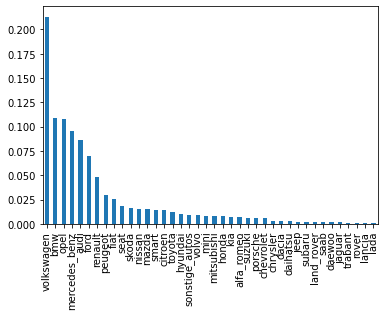

In [26]:
print(autos['brand'].value_counts(normalize=True))
autos['brand'].value_counts(normalize=True).plot.bar()

Volkswagen is by far the most common brand in this dataset with more than twice as much cars than the second most common brand, BMW. From the second most common on, the decay is slower.

It is also interesting to notice that the five most common brand are german brands, which makes perfect sense since this dataset comes from a german website.

We'll now find the average price for the most common brands. For that, we will first create a new series containing only the brands that represent more than 5% of total of cars.

In [27]:
brand_count = autos['brand'].value_counts(normalize=True)
popular_brands = brand_count[brand_count > 0.05].index


print(popular_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


Now we'll loop through the most common brands and store the average price for each one in a dicionary. The dictionary's keys are the names of the brands and its values are the average price for that brand.

Then we will use the `display_table()` function to display the dictionary in a more readable way.

In [28]:
pop_brand_mean_prices = {}

def display_table(table):   
    table_display = []
    for key in table:
        key_tuple = (table[key], key)
        table_display.append(key_tuple)
    table_sorted = sorted(table_display, reverse=True)
    for tuple in table_sorted:
        print(tuple[1], ':', tuple[0])

for brands in popular_brands:
    brand = autos[autos['brand'] == brands]
    mean_price = brand['price'].mean()
    pop_brand_mean_prices[brands] = round(mean_price, 2)
    
display_table(pop_brand_mean_prices)

audi : 9259.51
mercedes_benz : 8570.77
bmw : 8310.14
volkswagen : 5559.97
ford : 4053.76
opel : 2971.61


We can see that among the most common brands Audi is the most expensive one and Opel is the least expensive one.

We'll repeat the process to check on the average mileage for the most common brands. We'll again use the `display_table()` function.

In [29]:
pop_brand_mean_mileage = {}

for brands in popular_brands:
    brand = autos[autos['brand'] == brands]
    mean_mileage = brand['odometer_km'].mean()
    pop_brand_mean_mileage[brands] = round(mean_mileage, 2)

display_table(pop_brand_mean_mileage)

bmw : 132824.72
mercedes_benz : 131079.77
audi : 129604.53
opel : 129512.45
volkswagen : 129060.28
ford : 124361.04


BMW has the highest mileage average while Ford has the lowest.

Now let's aggregate these informations into a new DataFrame so it is easier to visualize and compare the brands.
First we use the Series constructor to convert the dictionaries into Series.

In [30]:
s_price = pd.Series(pop_brand_mean_prices)
s_mileage = pd.Series(pop_brand_mean_mileage)

Now we'll convert the first serie into a DataFrame and the add the second serie as a column to this new Dataframe that will then be displayed.

In [31]:
price_mileage = pd.DataFrame(s_price, columns=['mean_price'])
price_mileage['mean_mileage'] = s_mileage
price_mileage

,mean_price,mean_mileage
volkswagen,5559.97,129060.28
bmw,8310.14,132824.72
opel,2971.61,129512.45
mercedes_benz,8570.77,131079.77
audi,9259.51,129604.53
ford,4053.76,124361.04


Let's now do some data visualization and plot this DataFrame.

C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

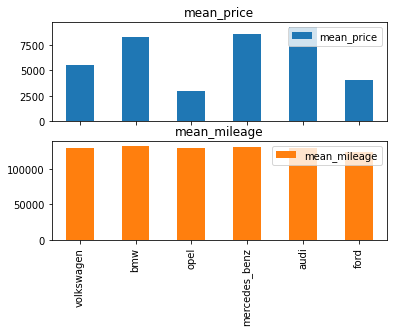

In [32]:
price_mileage.plot.bar(subplots=True);

We can see that although there is a great variation in the average price between the most common brands, the average mileage is pretty much the same.

We'll now analyse the impact of the mileage in the average price. First, let's see the distinct mileage values once more.

Note that we are using the whole dataset again.

In [33]:
autos['odometer_km'].sort_values(ascending=False).unique()

array([150000, 125000, 100000,  90000,  80000,  70000,  60000,  50000,
        40000,  30000,  20000,  10000,   5000], dtype=int64)

As the mileage values are rounded and there are only 13 values, we can use them as the references without the need to split the values into intervals.

We're going to plot a chart with average price per mileage.

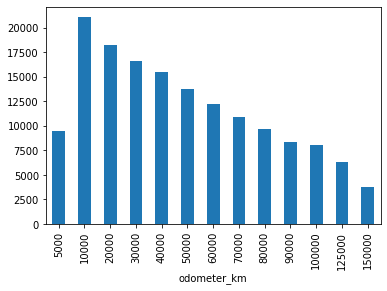

In [34]:
autos.groupby('odometer_km').price.mean().plot.bar()

For some reason the cars with the lowest mileage values are ones with the lowest average price, which is odd. 

But aside from that, the lowest the mileage, the highest the average price, which makes perfect sense.

As we approach the end of this project, we will see how much the 'unrepaired_damage' and 'gearbox' columns affect the average price. We'll again use `DataFrame.groupby`.

unrepaired_damage
no     7127.73
yes    2465.63
Name: price, dtype: float64


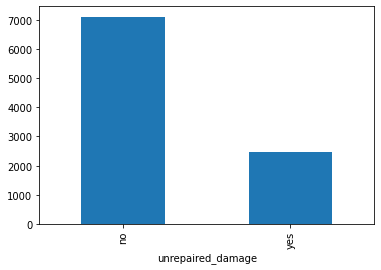

In [35]:
print(round(autos.groupby('unrepaired_damage').price.mean(),2))
autos.groupby('unrepaired_damage').price.mean().plot.bar()

gearbox
automatic    10882.80
manually      4765.53
Name: price, dtype: float64


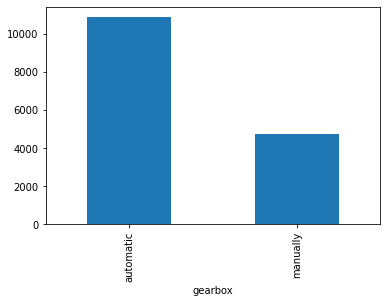

In [36]:
print(round(autos.groupby('gearbox').price.mean(),2))
autos.groupby('gearbox').price.mean().plot.bar()

We can see that cars with no damage cost, in average, almost three times more than damaged cars. Also, cars with automatic transmission cost more than twice as much as cars with manual transmissions, in average.

# Conclusion


This project aimed to clean the dataset and then perform some analysis. These objectives are now fulfilled.

I appreciate you reading this all the way to the end. I'm also open to suggestions and ideas for more analysis and projects.